<a href="https://colab.research.google.com/github/roquearmas/IABD_DATA/blob/main/Djikstra_Clipspy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de Dijkstra con CLIPS y ClipsPy
***Introducción***

Se trata de invocar a *CLIPS*, mediante *ClipsPy*, para resolver un problema de camino mínimo entre nodos de un grafo, aplicando la teoría del algoritmo de Dijkstra, si existe un camino con coste menor a la ruta directa, sustituye dicho camino por la ruta directa.

Se le pasaran los hechos y una regla, para el cálculo de dicho camino mínimo.

El programa deberá pedir los nodos origen y destino por teclado y devolverá el coste y la ruta de dicho camino mínimo.

***Instalación de la librería ClipsPy***

In [ ]:
pip install clipspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.6/891.6 kB 9.9 MB/s eta 0:00:00


Importación del entorno de CLIPS y creación de la plantilla ***RUTA***

In [ ]:
from clips import Environment

# Defino las reglas y hechos
DEFTEMPLATE_STRING = """
(deftemplate RUTA
   (field ORIGEN)
   (field DESTINO)
   (field COSTE)
   (field ATAJO))
"""

# Creación de los hechos (definición de los grafos de prueba)
***Grafo 1***
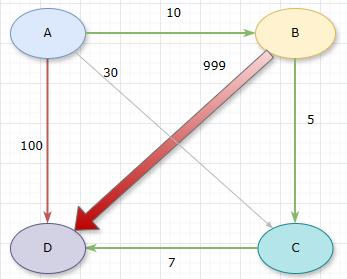

In [ ]:
# DEFFACTS_STRING = """
# (deffacts DISTANCIAS
#    (RUTA (ORIGEN A) (DESTINO B) (COSTE 10) (ATAJO ""))
#    (RUTA (ORIGEN A) (DESTINO C) (COSTE 30) (ATAJO ""))
#    (RUTA (ORIGEN A) (DESTINO D) (COSTE 100) (ATAJO "") )
#    (RUTA (ORIGEN B) (DESTINO C) (COSTE 5) (ATAJO ""))
#    (RUTA (ORIGEN B) (DESTINO D) (COSTE 999) (ATAJO ""))
#    (RUTA (ORIGEN C) (DESTINO D) (COSTE 7) (ATAJO ""))
#    )
# """

***Grafo 2***

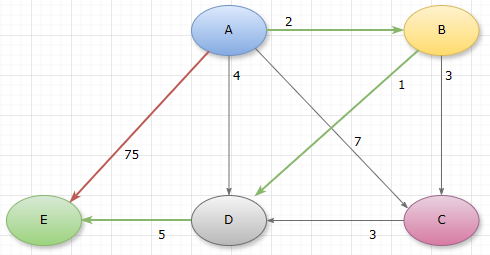

In [ ]:
DEFFACTS_STRING = """
(deffacts DISTANCIAS
   (RUTA (ORIGEN A) (DESTINO B) (COSTE 2) (ATAJO ""))
   (RUTA (ORIGEN A) (DESTINO C) (COSTE 7) (ATAJO ""))
   (RUTA (ORIGEN A) (DESTINO D) (COSTE 4) (ATAJO ""))
   (RUTA (ORIGEN A) (DESTINO E) (COSTE 75) (ATAJO ""))
   (RUTA (ORIGEN B) (DESTINO C) (COSTE 3) (ATAJO ""))
   (RUTA (ORIGEN B) (DESTINO D) (COSTE 1) (ATAJO ""))
   (RUTA (ORIGEN B) (DESTINO E) (COSTE 20) (ATAJO ""))
   (RUTA (ORIGEN C) (DESTINO D) (COSTE 3) (ATAJO ""))
   (RUTA (ORIGEN D) (DESTINO E) (COSTE 5) (ATAJO ""))
   )
"""

Definición de la regla ***CALCULA***

En este paso es donde se encuentra la definición del algoritmo en sí, donde se modifican los hechos, de tal manera que se pueda generar el hecho final, que nos devuelve el coste total y la ruta que se ha seguido.

In [ ]:
DEFRULE_STRING = """
(defrule CALCULA
   ?HECHO1 <-(RUTA (ORIGEN ?ORI) (DESTINO ?DEST) (COSTE ?COSTE1) )
   (RUTA (ORIGEN ?OTRO) (DESTINO ?DEST) (COSTE ?COSTE2) (ATAJO ?ATAJO1)    )
   (RUTA (ORIGEN ?ORI) (DESTINO ?OTRO) (COSTE ?COSTE3) )
   (test (< (+ ?COSTE2 ?COSTE3) ?COSTE1))
   =>
   (modify ?HECHO1 (COSTE (+ ?COSTE2 ?COSTE3)) (ATAJO (str-cat ?OTRO ?ATAJO1)))
)
"""

Ejecución dentro de Python, mediante ClipsPy.

Básicamente se trata de crear un entorno de CLIPS y construir los elementos creados anteriormente (plantilla, hechos y regla)

Desde Python se piden los dos parametros necesarios: Nodo de Origen y Destino

Ejecuta las activaciones en la agenda, lo que implica que las reglas se activarán y evaluarán en función de los hechos disponibles.

Busca los hechos en el entorno. Encuentra la ruta más corta entre el nodo de origen y destino o a través de nodos intermedios.

Devuelve la ruta más corta encontrada, incluyendo el coste y el atajo si corresponde, o indica si no se encontró una ruta



In [ ]:

# Crea el entorno CLIPS
environment = Environment()

# Construye los objetos de CLIPS
environment.build(DEFTEMPLATE_STRING)
environment.build(DEFFACTS_STRING)
environment.build(DEFRULE_STRING)

# Recupera la plantilla de hecho
template = environment.find_template('RUTA')

# Pregunta por los nodos de origen y destino
nodo_origen  = str(input("Nodo Origen : ")).upper()
nodo_destino = str(input("Nodo Destino: ")).upper()

# Ejecuta las activaciones en la agenda
environment.reset()
environment.run()

# Buscar hechos en el entorno
facts = environment.facts()
environment.facts()
# Encuentra la ruta más corta
ruta_mas_corta = None
for fact in facts:
    print(fact['ORIGEN'] , '-->' , fact['DESTINO'] , ' - Coste =' , fact['COSTE'] , ' - Ruta Intermedia:' , fact['ATAJO'])
    if fact.template.name == 'RUTA' and ((fact['ORIGEN'] == nodo_origen and fact['DESTINO'] == nodo_destino) or (fact['ORIGEN'] == nodo_origen and fact['ATAJO'] == nodo_destino)):
        ruta_mas_corta = fact
        break

if ruta_mas_corta:
    print(f"La ruta más corta desde {nodo_origen} a {nodo_destino} es:")
    print(f"Coste: {ruta_mas_corta['COSTE']}, Atajo: {nodo_origen}{ruta_mas_corta['ATAJO']}{nodo_destino}")
else:
    print(f"No se encontró una ruta de {nodo_origen} a {nodo_destino}.")


Nodo Origen : A
Nodo Destino: E
A --> B  - Coste = 2  - Ruta Intermedia: 
A --> C  - Coste = 5  - Ruta Intermedia: B
A --> D  - Coste = 3  - Ruta Intermedia: B
A --> E  - Coste = 8  - Ruta Intermedia: BD
La ruta más corta desde A a E es:
Coste: 8, Atajo: ABDE
